In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib

import comptools as comp
from submit_feature_scan import scan_features

color_dict = comp.color_dict

%matplotlib inline

In [4]:
config = 'IC86.2012'
num_groups = 2
pipeline = 'xgboost'
energybins = comp.get_energybins()
comp_list = comp.get_comp_list(num_groups=num_groups)

In [5]:
pipeline_str = '{}_comp_{}_{}-groups'.format(pipeline, config, num_groups)
pipeline_str

'xgboost_comp_IC86.2012_2-groups'

In [28]:
def plot_feature_importances(feature_importances, feature_labels):
    num_features = len(feature_labels)
    importances = feature_importances
    indices = np.argsort(importances)[::-1]

    fig, ax = plt.subplots()
    for f in range(num_features):
        print('{}) {}'.format(f + 1, importances[indices[f]]))

    plt.ylabel('Feature Importances')
    plt.bar(range(num_features),
            importances[indices],
            align='center')

    plt.xticks(range(num_features),
               feature_labels[indices],
               rotation=90)
    plt.xlim([-1, num_features])
    # plt.ylim([0, .40])
    ax.grid(axis='y')
    plt.show()

{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 150, 'classifier__max_depth': 7}
{'classifier__learning_rate': 0.025, 'classifier__n_estimators': 200, 'classifier__max_depth': 8}
{'classifier__learning_rate': 0.025, 'classifier__n_estimators': 600, 'classifier__max_depth': 7}


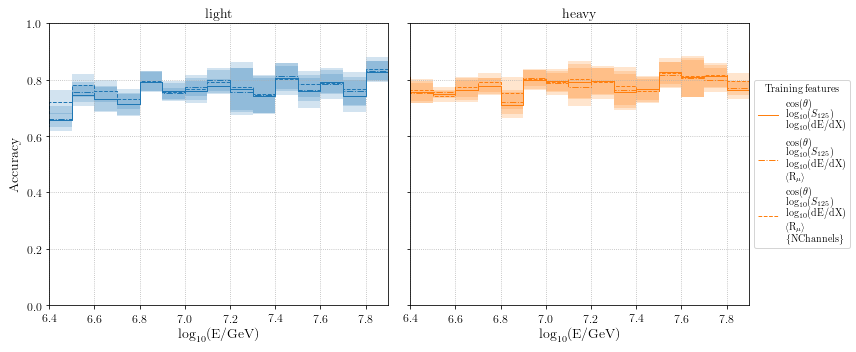

In [32]:
cwd = os.getcwd()
linestyles = ['-', '-.', '--']
fig, axarr = plt.subplots(ncols=len(comp_list), figsize=(12, 5), sharex=True, sharey=True)
for features, ls in zip(scan_features, linestyles):
    features_str = '-'.join(features)
    results_basename = '{}-{}.pkl'.format(pipeline_str, features_str)
    results_file = os.path.join(cwd,
                                'feature_scan_results',
                                results_basename)
    results = joblib.load(results_file)
    print(results['best_params'])

    for idx, (composition, ax) in enumerate(zip(comp_list, axarr.flat)):
        labels = results['feature_labels']
        formatted_labels = [] 
        nchannels_flag = False
        for label in labels:
            if 'NChannels' in label:
                if not nchannels_flag:
                    formatted_labels.append('\{NChannels\}')
                    nchannels_flag = True
                else:
                    continue
            else:
                formatted_labels.append(label)
        # Add to plot
        comp.plot_steps(energybins.log_energy_bins,
                        results['acc_mean_{}'.format(composition)],
                        yerr=results['acc_std_{}'.format(composition)],
                        color=color_dict[composition],
                        ls=ls,
#                         label=', '.join(results['feature_labels']),
                        label='\n '.join(formatted_labels),
                        ax=ax)

        ax.set_xlim(6.4, 7.9)
        ax.set_ylim(0, 1)
        ax.set_xlabel('$\mathrm{\log_{10}(E/GeV)}$')
        if idx == 0:
            ax.set_ylabel('Accuracy')
        ax.set_title(composition)
        ax.grid(lw=0.8)
        if idx == len(comp_list) - 1:
#             ax.legend(title='Training features', fontsize=10)
            ax.legend(title='Training features', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
# ax.legend(title='Training features', loc='lower left', fontsize=10)
outfile = os.path.join(comp.paths.figures_dir, 
                       'model_evaluation',
                       'new_features',
                       '{}_num_groups-{}.png'.format(config, num_groups))
comp.check_output_dir(outfile)
plt.savefig(outfile)
plt.show()

1) 0.366678625345
2) 0.318051308393
3) 0.315270066261


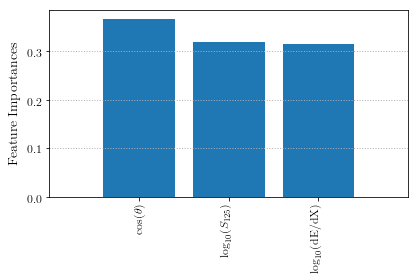

1) 0.275448918343
2) 0.25782096386
3) 0.246561408043
4) 0.220168724656


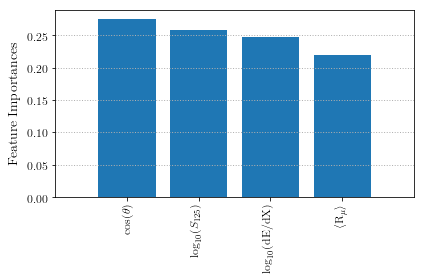

1) 0.195756226778
2) 0.169726133347
3) 0.156970143318
4) 0.126868993044
5) 0.0905008614063
6) 0.0838144570589
7) 0.0641993582249
8) 0.0574636086822
9) 0.0547002218664


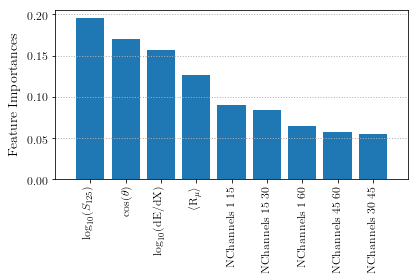

In [33]:
for features, ls in zip(scan_features, linestyles):
    features_str = '-'.join(features)
    results_basename = '{}-{}.pkl'.format(pipeline_str, features_str)
    results_file = os.path.join(cwd,
                                'feature_scan_results',
                                results_basename)
    results = joblib.load(results_file)

    importances = results['pipeline'].named_steps['classifier'].feature_importances_
    feature_labels = np.array(results['feature_labels'])
    plot_feature_importances(importances, feature_labels)

In [15]:
results.keys()

['pipeline',
 'acc_std_heavy',
 'features',
 'feature_labels',
 'best_params',
 'acc_mean_light',
 'log_energy_bins',
 'sklearn_version',
 'pipeline_name',
 'source_code',
 'acc_mean_heavy',
 'config',
 'num_groups',
 'acc_std_light']

In [18]:
feature_labels

('$\\cos(\\theta)$',
 '$\\log_{10}(S_{\\mathrm{125}})$',
 '$\\mathrm{\\log_{10}(dE/dX)}$',
 '$\\mathrm{\\langle R_{\\mu} \\rangle }$',
 'NChannels 1 60',
 'NChannels 1 15',
 'NChannels 15 30',
 'NChannels 30 45',
 'NChannels 45 60')

1) 0.195756226778
2) 0.169726133347
3) 0.156970143318
4) 0.126868993044
5) 0.0905008614063
6) 0.0838144570589
7) 0.0641993582249
8) 0.0574636086822
9) 0.0547002218664


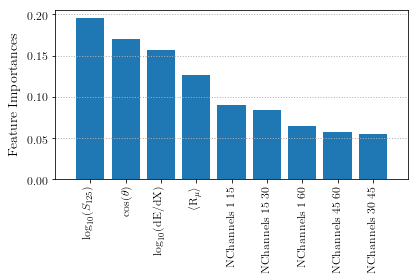

In [27]:
feature_labels = np.array(results['feature_labels'])
num_features = len(feature_labels)
importances = results['pipeline'].named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots()
for f in range(num_features):
    print('{}) {}'.format(f + 1, importances[indices[f]]))

plt.ylabel('Feature Importances')
plt.bar(range(num_features),
        importances[indices],
        align='center')

plt.xticks(range(num_features),
           feature_labels[indices],
           rotation=90)
plt.xlim([-1, num_features])
# plt.ylim([0, .40])
ax.grid(axis='y')
plt.show()

In [11]:
clf = results['pipeline'].named_steps['classifier'].feature_importances_
clf.feature_importances_

array([0.16972613, 0.19575623, 0.15697014, 0.126869  , 0.06419936,
       0.09050086, 0.08381446, 0.05470022, 0.05746361], dtype=float32)

In [12]:
clf.classes_

array([0, 1])

In [14]:
clf.__dict__

{'_Booster': <xgboost.core.Booster at 0x7f1f55b67650>,
 '_features_count': 9,
 '_le': LabelEncoder(),
 'base_score': 0.5,
 'booster': 'gbtree',
 'classes_': array([0, 1]),
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'kwargs': {},
 'learning_rate': 0.025,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': nan,
 'n_classes_': 2,
 'n_estimators': 600,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

In [4]:
cwd = os.getcwd()
results_file = os.path.join(cwd,
                            'feature_scan_results',
                            'xgboost_comp_IC86.2012_2-groups-lap_cos_zenith-log_s125-log_dEdX.pkl')
results = joblib.load(results_file)

In [5]:
results

{'acc_mean': array([0.67592717, 0.70404525, 0.71567191, 0.71923716, 0.74559821,
        0.74882806, 0.74671811, 0.75102311, 0.78425168, 0.76885471,
        0.78150445, 0.75578166, 0.7713787 , 0.77607552, 0.78841407,
        0.77229491, 0.77016166, 0.77596939, 0.79522635]),
 'acc_std': array([0.01158286, 0.01368767, 0.01486903, 0.0108554 , 0.00805719,
        0.01749853, 0.00976711, 0.01142205, 0.01088052, 0.02954736,
        0.01109182, 0.01546985, 0.01300799, 0.01131126, 0.01196021,
        0.01184983, 0.00752094, 0.0257484 , 0.02076233]),
 'best_params': {'classifier__learning_rate': 0.2,
  'classifier__max_depth': 3,
  'classifier__n_estimators': 200},
 'config': 'IC86.2012',
 'feature_labels': ('$\\cos(\\theta)$',
  '$\\log_{10}(S_{\\mathrm{125}})$',
  '$\\mathrm{\\log_{10}(dE/dX)}$'),
 'features': ('lap_cos_zenith', 'log_s125', 'log_dEdX'),
 'log_energy_bins': array([6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3,
        7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ]),
 'num

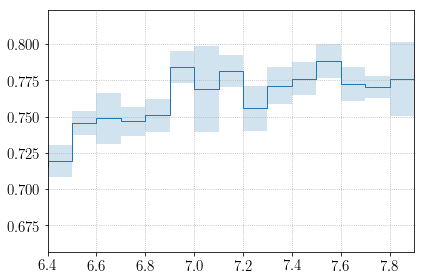

In [12]:
fig, ax = plt.subplots()
comp.plot_steps(energybins.log_energy_bins,
                results['acc_mean'],
                yerr=results['acc_std'])
ax.set_xlim(6.4, 7.9)
ax.grid(lw=0.8)
plt.show()

In [15]:
pipeline = results['pipeline']